In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
import seaborn as sns

target_feature = 'SalePrice'

%matplotlib inline

In [3]:
df_train = pd.read_csv('train_boston.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [36]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
df_train[['GrLivArea','SalePrice']].describe()

,GrLivArea,SalePrice
count,1460.000000,1460.000000
mean,1515.463699,180921.195890
std,525.480383,79442.502883
min,334.000000,34900.000000
25%,1129.500000,129975.000000
50%,1464.000000,163000.000000
75%,1776.750000,214000.000000
max,5642.000000,755000.000000


## Подивимося відсоток нульових значень у ознаках

In [6]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)
print(df_train[missing_data[missing_data['Percent'] == 0].index]['SalePrice'])

             Total   Percent
PoolQC        1453  0.995205
MiscFeature   1406  0.963014
Alley         1369  0.937671
Fence         1179  0.807534
FireplaceQu    690  0.472603
...            ...       ...
ExterQual        0  0.000000
Exterior2nd      0  0.000000
Exterior1st      0  0.000000
RoofMatl         0  0.000000
SalePrice        0  0.000000

[81 rows x 2 columns]
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


## Видалимо всі ознаки, у яких є нульові значення

In [7]:
updated_set = df_train.drop(missing_data[missing_data['Percent'] != 0].index, 1)
updated_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

C:\Users\mishy\AppData\Local\Temp\ipykernel_3340\2967972881.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  updated_set = df_train.drop(missing_data[missing_data['Percent'] != 0].index, 1)


## Перевіримо, що більше ознак з порожніми значеннями немає

In [8]:
total = updated_set.isnull().sum().sort_values(ascending=False)
percent = (updated_set.isnull().sum() / updated_set.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)
updated_set = updated_set.drop(missing_data[missing_data['Percent'] > 0].index, 1)
updated_set.info()

              Total  Percent
Id                0      0.0
Fireplaces        0      0.0
1stFlrSF          0      0.0
2ndFlrSF          0      0.0
LowQualFinSF      0      0.0
...             ...      ...
Foundation        0      0.0
BsmtFinSF1        0      0.0
BsmtFinSF2        0      0.0
BsmtUnfSF         0      0.0
SalePrice         0      0.0

[62 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  N

C:\Users\mishy\AppData\Local\Temp\ipykernel_3340\3345054399.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  updated_set = updated_set.drop(missing_data[missing_data['Percent'] > 0].index, 1)


## Будуємо матрицю кореляцій

In [9]:
corr_matrix = updated_set.corr() # calc correlation
target_corr_features = corr_matrix[target_feature][corr_matrix[target_feature] < 0.1]
print(target_corr_features)

Id              -0.021917
MSSubClass      -0.084284
OverallCond     -0.077856
BsmtFinSF2      -0.011378
LowQualFinSF    -0.025606
BsmtHalfBath    -0.016844
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
3SsnPorch        0.044584
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Name: SalePrice, dtype: float64


<AxesSubplot:>

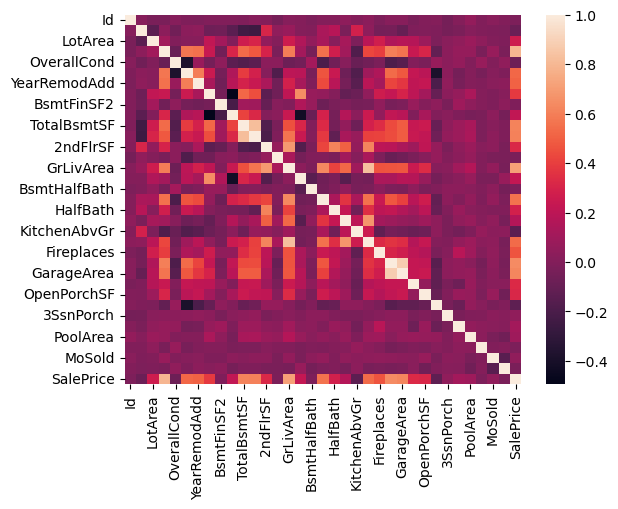

In [10]:
sns.heatmap(corr_matrix)

## Видаляємо ознаки з низькою кореляцією

In [11]:
keys = corr_matrix[target_feature][corr_matrix[target_feature] <= 0.1][corr_matrix[target_feature] != 1.0].keys()
result = updated_set.drop(keys, 1)
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   LotArea        1460 non-null   int64 
 2   Street         1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  OverallQual    1460 non-null   int64 
 14  YearBuilt      1460 non-null   int64 
 15  YearRemodAdd   1460 non-null   int64 
 16  RoofStyle      1460 non-null   object
 17  RoofMatl       1460 non-null   object
 18  Exterior1st    1460 non-null

C:\Users\mishy\AppData\Local\Temp\ipykernel_3340\2595213126.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  result = updated_set.drop(keys, 1)


<AxesSubplot:>

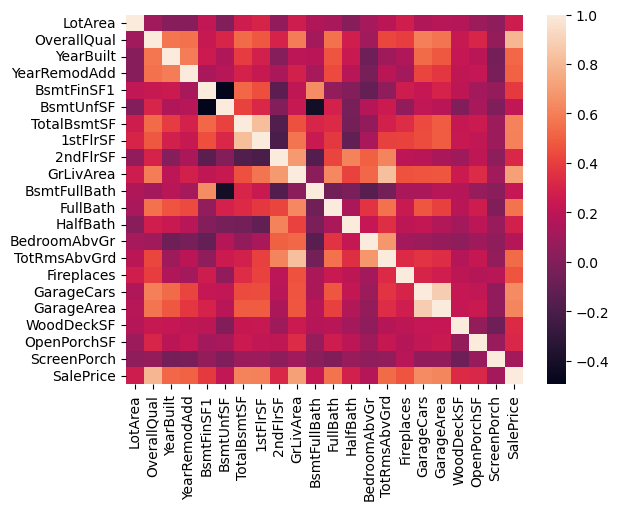

In [12]:
sns.heatmap(result.corr())

## Розбираємось з ознаками з нечисловими значеннями

In [13]:
types = result.dtypes
no_numerical_keys = []
for key in result.keys():
    if types[key] == np.object_:
        no_numerical_keys.append(key) # get names of no numerical features

In [14]:
no_text = result.drop(no_numerical_keys, 1)
no_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   OverallQual   1460 non-null   int64
 2   YearBuilt     1460 non-null   int64
 3   YearRemodAdd  1460 non-null   int64
 4   BsmtFinSF1    1460 non-null   int64
 5   BsmtUnfSF     1460 non-null   int64
 6   TotalBsmtSF   1460 non-null   int64
 7   1stFlrSF      1460 non-null   int64
 8   2ndFlrSF      1460 non-null   int64
 9   GrLivArea     1460 non-null   int64
 10  BsmtFullBath  1460 non-null   int64
 11  FullBath      1460 non-null   int64
 12  HalfBath      1460 non-null   int64
 13  BedroomAbvGr  1460 non-null   int64
 14  TotRmsAbvGrd  1460 non-null   int64
 15  Fireplaces    1460 non-null   int64
 16  GarageCars    1460 non-null   int64
 17  GarageArea    1460 non-null   int64
 18  WoodDeckSF    1460 non-null   int64
 19  OpenPorchSF   1460 non-null

C:\Users\mishy\AppData\Local\Temp\ipykernel_3340\3958528197.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  no_text = result.drop(no_numerical_keys, 1)


In [15]:
norm_set = no_text #.drop(exclude_feature, 1)
feature_keys = norm_set.keys()
return_norm_set = (norm_set[feature_keys[:]][:] - norm_set[feature_keys[:]].mean()) / norm_set[feature_keys[:]].max()

In [16]:
norm_set.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,SalePrice
0,8450,7,2003,2003,706,150,856,856,854,1710,...,1,3,8,0,2,548,0,61,0,208500
1,9600,6,1976,1976,978,284,1262,1262,0,1262,...,0,3,6,1,2,460,298,0,0,181500
2,11250,7,2001,2002,486,434,920,920,866,1786,...,1,3,6,1,2,608,0,42,0,223500
3,9550,7,1915,1970,216,540,756,961,756,1717,...,0,3,7,1,3,642,0,35,0,140000
4,14260,8,2000,2000,655,490,1145,1145,1053,2198,...,1,4,9,1,3,836,192,84,0,250000


In [17]:
return_norm_set.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,SalePrice
0,-0.009602,0.090068,0.015787,0.009022,0.046485,-0.178613,-0.032967,-0.065351,0.245524,0.034480,...,0.308562,0.016695,0.105871,-0.204338,0.058219,0.052905,-0.109970,0.026215,-0.031377,0.036528
1,-0.004259,-0.009932,0.002354,-0.004411,0.094678,-0.121250,0.033481,0.021179,-0.168035,-0.044924,...,-0.191438,0.016695,-0.036986,0.128995,0.058219,-0.009154,0.237754,-0.085302,-0.031377,0.000767
2,0.003406,0.090068,0.014792,0.008525,0.007505,-0.057038,-0.022493,-0.051711,0.251335,0.047950,...,0.308562,0.016695,-0.036986,0.128995,0.058219,0.095219,-0.109970,-0.008520,-0.031377,0.056396
3,-0.004492,0.090068,-0.027994,-0.007396,-0.040333,-0.011661,-0.049334,-0.042972,0.198067,0.035721,...,-0.191438,0.016695,0.034442,0.128995,0.308219,0.119196,-0.109970,-0.021317,-0.031377,-0.054200
4,0.017390,0.190068,0.014295,0.007529,0.037449,-0.033065,0.014332,-0.003757,0.341892,0.120974,...,0.308562,0.141695,0.177299,0.128995,0.308219,0.256008,0.114067,0.068263,-0.031377,0.091495


## Виділяємо частину набору даних для валідації

In [18]:
X_train = return_norm_set[:return_norm_set.shape[0]-290].drop(target_feature, 1)
X_test = return_norm_set[return_norm_set.shape[0]-290:].drop(target_feature, 1)
y_train = return_norm_set.SalePrice[:return_norm_set.shape[0]-290]
y_test = return_norm_set.SalePrice[return_norm_set.shape[0]-290:]

C:\Users\mishy\AppData\Local\Temp\ipykernel_3340\3020421452.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = return_norm_set[:return_norm_set.shape[0]-290].drop(target_feature, 1)
C:\Users\mishy\AppData\Local\Temp\ipykernel_3340\3020421452.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = return_norm_set[return_norm_set.shape[0]-290:].drop(target_feature, 1)


## Ділимо тренувальний сет

In [19]:
train_set, test_set, target_train, target_test = train_test_split(X_train.values, y_train.values, test_size=0.2)

In [20]:
train_set.shape

(936, 21)

In [21]:
target_train.shape

(936,)

## Створюємо та навчаємо лінійну модель

In [22]:
skm = lm.LinearRegression(fit_intercept=True, normalize=False)
skm.fit(train_set, target_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

## Перевіряємо результат

In [23]:
from sklearn.metrics import r2_score
r2_score(target_train, skm.predict(train_set))

0.8305388214747684

In [24]:
r2_score(y_test.values, skm.predict(X_test.values))

0.5929463147188533

## Пробуємо інші регресійні моделі

In [25]:
from sklearn.linear_model import LassoCV, LassoLarsCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [26]:
model_lasso = LassoCV(alphas = [100, 10, 1, 0.1, 0.001, 0.0002], cv = 5).fit(X_train, y_train)

In [33]:
preds = pd.DataFrame({"preds":model_lasso.predict(X_test), "true":y_test})
r2_score(preds.preds, preds.true)

0.6126950094340924

In [29]:
model_ridge = Ridge()

In [30]:
alphas = [0.001,0.05, 0.1, 0.3, 1, 3, 5, 10]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

In [31]:
cv_ridge = pd.Series(cv_ridge, index = alphas)

In [34]:
model_ridge.fit(X_train, y_train)
r2_score(model_ridge.predict(X_test), y_test)

0.6098364950750278